In [1]:
!wget https://raw.githubusercontent.com/JoseCaliz/dotfiles/main/css/custom_css.css 2>/dev/null 1>&2
!pip install feature_engine 2>/dev/null 1>&2
    
from IPython.core.display import HTML
with open('./custom_css.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

In [2]:
import pandas as pd
import seaborn as sns
import warnings
import os
import dask.dataframe as dd
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import KFold
import matplotlib as mpl
from itertools import product as cartessian_product
from feature_engine.encoding import OneHotEncoder
import dateutil.easter as easter
from rich import print
import numpy as np
from sklearn.linear_model import LinearRegression
from rich.progress import track
from collections import deque


warnings.simplefilter(action='ignore', category=FutureWarning)
def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color= '#fdfcf6'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)

# print('Notebook Palette')
# sns.color_palette(palette)

In [3]:
train_labels = pd.read_csv('../input/tabular-playground-series-nov-2022/train_labels.csv', index_col=0)
train_labels.label.value_counts(True)

0    0.5
1    0.5
Name: label, dtype: float64

In [6]:
!pwd

/kaggle/working


In [ ]:
'../input/tabular-playground-series-nov-2022/sample_submission.csv'

<AxesSubplot:>

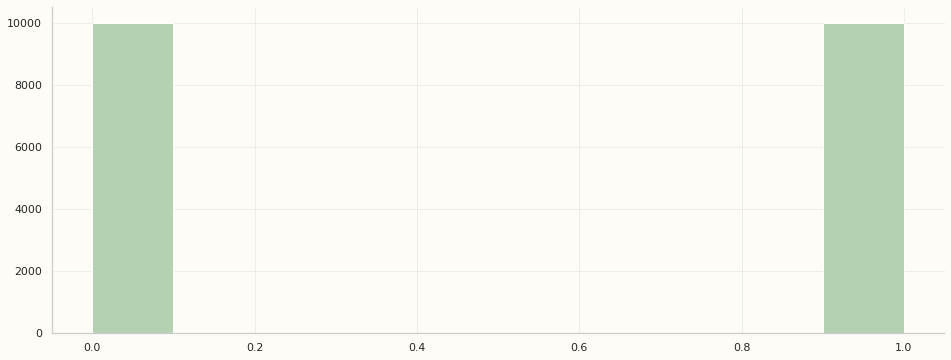

In [5]:
train_labels['label'].hist()

In [8]:
train_labels['label'].describe()

count    20000.000000
mean         0.500000
std          0.500013
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [9]:
%%time
READ_FROM_CSV = False
if READ_FROM_CSV:
    predictions_files = []
    path = '../input/tabular-playground-series-nov-2022/submission_files'

    for file in track(os.listdir(path)):
        prediction = pd.read_csv(
            os.path.join(path, file),
            index_col=0,
            dtype={'id':np.int32, 'pred':np.float64}
        ) 

        prediction.columns = [file]
        predictions_files.append(prediction)

    preds_df = pd.concat(predictions_files, axis=1)
    preds_df.to_parquet('./preds_concat.parquet', compression='gzip')
else:
    preds_df = pd.read_parquet(
        '../input/tps-nov21-concat-submissions-float64/preds_concat_gzip.parquet'
    )

CPU times: user 18.9 s, sys: 6.02 s, total: 24.9 s
Wall time: 29.9 s


In [10]:
print('total null predictions', preds_df.isnull().sum().sum())

total null predictions 20000

In [12]:
preds_df.shape

(40000, 5001)

In [13]:
preds_df

,0.7301891713.csv,0.6750726968.csv,0.7194704070.csv,0.7107007521.csv,0.6952032365.csv,0.7311830751.csv,0.6736005999.csv,0.7205109360.csv,0.7298116981.csv,0.6737624943.csv,...,0.7056743178.csv,0.6850481924.csv,0.7359858591.csv,0.7068431477.csv,0.7121179915.csv,0.6613117872.csv,0.6843637618.csv,0.6781392004.csv,0.7222809303.csv,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.713797,0.894976,0.817926,0.810555,0.791920,0.831945,0.774879,0.741634,0.756136,0.727903,...,0.810299,0.768360,0.796567,0.838916,0.765676,0.659398,0.799853,0.831508,0.824168,0.0
1,0.663330,0.640218,0.574168,0.574927,0.667912,0.756107,0.638533,0.605146,0.624973,0.605908,...,0.640244,0.646700,0.700815,0.633100,0.657584,0.536717,0.649205,0.601636,0.532060,1.0
2,0.772586,0.816572,0.880483,0.829270,0.765237,0.821705,0.839576,0.824883,0.841343,0.781148,...,0.845959,0.781653,0.826756,0.848539,0.838114,0.718964,0.778684,0.779648,0.809955,1.0
3,0.710306,0.782159,0.725897,0.737912,0.787249,0.686427,0.800052,0.695170,0.907122,0.735824,...,0.784754,0.741546,0.786590,0.845026,0.736329,0.652006,0.728600,0.704791,0.737956,1.0
4,0.955168,0.927211,0.945777,0.952514,0.962377,0.941336,0.970365,0.929135,0.967015,0.883663,...,0.956715,0.954226,0.930409,0.966629,0.943200,0.777345,0.969042,0.943642,0.941970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.559447,0.572972,0.479756,0.477114,0.516699,0.486287,0.498448,0.452154,0.484590,0.497521,...,0.527116,0.501550,0.581337,0.467776,0.510084,0.521364,0.529477,0.541101,0.540847,NaN
39996,0.599315,0.608869,0.593031,0.577790,0.588609,0.627257,0.581646,0.542022,0.649301,0.511550,...,0.492439,0.599930,0.597539,0.579216,0.634371,0.572948,0.644657,0.581255,0.541763,NaN
39997,0.703259,0.729625,0.786163,0.832797,0.753660,0.719173,0.781027,0.735086,0.807656,0.658647,...,0.751700,0.747778,0.754367,0.723701,0.737100,0.660322,0.760209,0.784987,0.848293,NaN


In [15]:
train_labels.shape

(20000, 1)

In [14]:
preds_df = preds_df.clip(0, 1)
preds_df['target'] = train_labels.label
train_preds = preds_df[preds_df.target.notnull()]
test_preds= preds_df[preds_df.target.isnull()]
test_preds = test_preds.drop(columns=['target'])

In [17]:
train_preds

,0.7301891713.csv,0.6750726968.csv,0.7194704070.csv,0.7107007521.csv,0.6952032365.csv,0.7311830751.csv,0.6736005999.csv,0.7205109360.csv,0.7298116981.csv,0.6737624943.csv,...,0.7056743178.csv,0.6850481924.csv,0.7359858591.csv,0.7068431477.csv,0.7121179915.csv,0.6613117872.csv,0.6843637618.csv,0.6781392004.csv,0.7222809303.csv,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.713797,0.894976,0.817926,0.810555,0.791920,0.831945,0.774879,0.741634,0.756136,0.727903,...,0.810299,0.768360,0.796567,0.838916,0.765676,0.659398,0.799853,0.831508,0.824168,0.0
1,0.663330,0.640218,0.574168,0.574927,0.667912,0.756107,0.638533,0.605146,0.624973,0.605908,...,0.640244,0.646700,0.700815,0.633100,0.657584,0.536717,0.649205,0.601636,0.532060,1.0
2,0.772586,0.816572,0.880483,0.829270,0.765237,0.821705,0.839576,0.824883,0.841343,0.781148,...,0.845959,0.781653,0.826756,0.848539,0.838114,0.718964,0.778684,0.779648,0.809955,1.0
3,0.710306,0.782159,0.725897,0.737912,0.787249,0.686427,0.800052,0.695170,0.907122,0.735824,...,0.784754,0.741546,0.786590,0.845026,0.736329,0.652006,0.728600,0.704791,0.737956,1.0
4,0.955168,0.927211,0.945777,0.952514,0.962377,0.941336,0.970365,0.929135,0.967015,0.883663,...,0.956715,0.954226,0.930409,0.966629,0.943200,0.777345,0.969042,0.943642,0.941970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.895664,0.846093,0.924664,0.910663,0.943051,0.882256,0.899632,0.944263,0.946831,0.820969,...,0.904057,0.917182,0.820322,0.890956,0.875581,0.738855,0.936819,0.896865,0.856597,1.0
19996,0.715574,0.676332,0.655044,0.729125,0.689934,0.580495,0.662890,0.745778,0.702234,0.712431,...,0.689908,0.696651,0.598459,0.648378,0.741098,0.624715,0.690874,0.627499,0.651058,1.0
19997,0.908069,0.904865,0.917872,0.912845,0.942786,0.826538,0.942841,0.930952,0.959169,0.867656,...,0.945845,0.937085,0.892670,0.945049,0.958039,0.751476,0.961496,0.956253,0.918514,0.0


In [16]:
test_preds

,0.7301891713.csv,0.6750726968.csv,0.7194704070.csv,0.7107007521.csv,0.6952032365.csv,0.7311830751.csv,0.6736005999.csv,0.7205109360.csv,0.7298116981.csv,0.6737624943.csv,...,0.7345858839.csv,0.7056743178.csv,0.6850481924.csv,0.7359858591.csv,0.7068431477.csv,0.7121179915.csv,0.6613117872.csv,0.6843637618.csv,0.6781392004.csv,0.7222809303.csv
id,,,,,,,,,,,,,,,,,,,,,
20000,0.867871,0.836487,0.801423,0.809090,0.814257,0.861163,0.817342,0.749610,0.791039,0.768047,...,0.712961,0.803151,0.815623,0.866089,0.847418,0.805188,0.704734,0.757721,0.816182,0.830314
20001,0.817833,0.759825,0.843282,0.868118,0.787268,0.731395,0.765803,0.870556,0.864339,0.764292,...,0.613982,0.835004,0.777346,0.807465,0.831164,0.843316,0.689247,0.777200,0.735059,0.823098
20002,0.584077,0.618392,0.634423,0.582778,0.584825,0.627230,0.545730,0.641814,0.455310,0.581311,...,0.538092,0.618666,0.651812,0.517199,0.614869,0.637379,0.569657,0.614039,0.654029,0.580779
20003,0.663766,0.715444,0.683324,0.661443,0.686075,0.750744,0.688281,0.667413,0.694960,0.636608,...,0.616827,0.664353,0.700342,0.704561,0.627003,0.660884,0.644809,0.684448,0.638808,0.675085
20004,0.743234,0.300322,0.521068,0.439724,0.602936,0.666159,0.618539,0.569212,0.622657,0.583715,...,0.932287,0.577704,0.716165,0.715132,0.727297,0.705207,0.697936,0.720313,0.744149,0.652447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.559447,0.572972,0.479756,0.477114,0.516699,0.486287,0.498448,0.452154,0.484590,0.497521,...,0.533065,0.527116,0.501550,0.581337,0.467776,0.510084,0.521364,0.529477,0.541101,0.540847
39996,0.599315,0.608869,0.593031,0.577790,0.588609,0.627257,0.581646,0.542022,0.649301,0.511550,...,0.594289,0.492439,0.599930,0.597539,0.579216,0.634371,0.572948,0.644657,0.581255,0.541763
39997,0.703259,0.729625,0.786163,0.832797,0.753660,0.719173,0.781027,0.735086,0.807656,0.658647,...,0.810670,0.751700,0.747778,0.754367,0.723701,0.737100,0.660322,0.760209,0.784987,0.848293


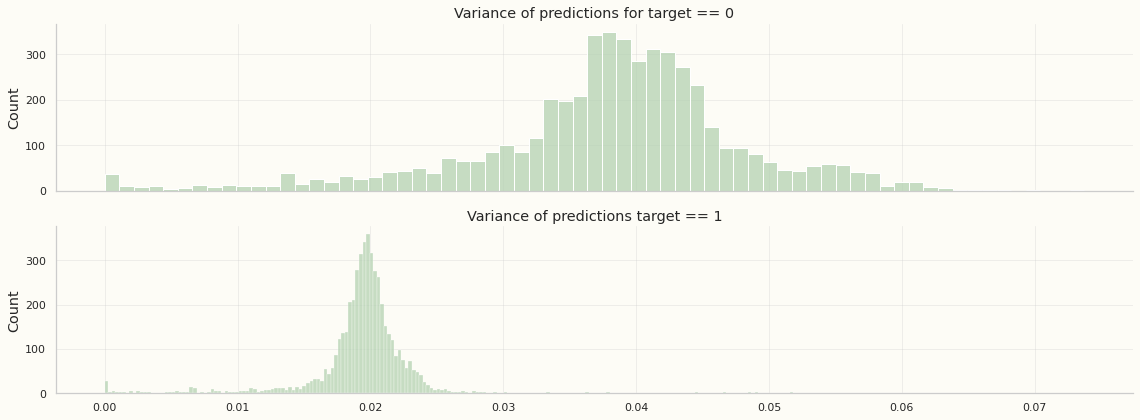

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(train_preds[train_preds.target == 0].var(), ax=ax[0])
sns.histplot(train_preds[train_preds.target == 1].var(), ax=ax[1])

ax[0].set_title('Variance of predictions for target == 0')
ax[1].set_title('Variance of predictions target == 1')
plt.tight_layout()

# Train Model


In [24]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

In [25]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate

model = LGBMClassifier(device='gpu', max_depth=3, random_state=42)
y = train_preds.target
X = train_preds.drop(columns=['target'])

results = cross_validate(
    model,
    X, y,
    cv=cv,
    scoring='neg_log_loss',
    return_train_score=True,
    verbose=1
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished


In [12]:
print(results)
print(np.mean(results['test_score']))

{
    'fit_time': array([32.87906122, 28.02800441, 27.39646459, 26.01968694, 27.54700994]),
    'score_time': array([0.41275907, 0.40994191, 0.40345025, 0.41474891, 0.49018598]),
    'test_score': array([-0.52925926, -0.52913655, -0.52687414, -0.5271045 , -0.51900451]),
    'train_score': array([-0.48622144, -0.48381256, -0.48716834, -0.48477832, -0.4882239 ])
}

-0.5262757920362381

# Generate Test Prediction

In [13]:
model.fit(X, y)
submission = pd.read_csv('../input/tabular-playground-series-nov-2022/sample_submission.csv', index_col=0)
submission_preds = model.predict_proba(test_preds)[:, 1]
submission['pred'] = submission_preds
submission.to_csv('submission.csv')